<a href="https://colab.research.google.com/github/uteThAn/BaitapAI_CNN/blob/main/money.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
from keras_preprocessing import image
import cv2
import os
import tensorflow as tf
import time
import matplotlib.pyplot as plt
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical,load_img,img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dropout,Dense
from tensorflow.keras.preprocessing import image

In [16]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True
                                  )
train = train_datagen.flow_from_directory('/content/drive/MyDrive/AI/money/train',
                                                 target_size = (150, 150),
                                                 batch_size = 12,
                                                 class_mode ='categorical')
vali_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
vali = vali_datagen.flow_from_directory('/content/drive/MyDrive/AI/money/validation',
                                            target_size = (150, 150),
                                            batch_size = 12,
                                            class_mode = 'categorical')

Found 438 images belonging to 11 classes.
Found 55 images belonging to 11 classes.


In [17]:
print("Image Processing.......Compleated")
model = tf.keras.models.Sequential()
print("Building Neural Network.....")
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[150, 150, 3]))
model.add(Dropout(0.2))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model.add(Dropout(0.2))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(Dropout(0.2))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model.add(Dropout(0.2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=256, activation='relu'))
model.add(Dropout(0.2))
model.add(tf.keras.layers.Dense(units=256, activation='relu'))
model.add(Dropout(0.2))
model.add(tf.keras.layers.Dense(units=11, activation='softmax'))

Image Processing.......Compleated
Building Neural Network.....


In [18]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [19]:
print("Training cnn")
history=model.fit( train, validation_data = vali, batch_size = 64,
                            epochs=35,
                           callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_accuracy',
            patience= 5,
            restore_best_weights=True
        )
    ])
model.save("/content/drive/MyDrive/AI/money.h5")

Training cnn
Epoch 1/35
37/37 [==============================] - 69s 2s/step - loss: 2.9237 - accuracy: 0.1005 - val_loss: 2.3924 - val_accuracy: 0.1091
Epoch 2/35
37/37 [==============================] - 66s 2s/step - loss: 2.3514 - accuracy: 0.1644 - val_loss: 2.3110 - val_accuracy: 0.1273
Epoch 3/35
37/37 [==============================] - 66s 2s/step - loss: 2.2091 - accuracy: 0.2283 - val_loss: 2.1777 - val_accuracy: 0.3636
Epoch 4/35
37/37 [==============================] - 69s 2s/step - loss: 1.9471 - accuracy: 0.3219 - val_loss: 1.9465 - val_accuracy: 0.4000
Epoch 5/35
37/37 [==============================] - 68s 2s/step - loss: 1.5985 - accuracy: 0.4521 - val_loss: 1.5044 - val_accuracy: 0.6182
Epoch 6/35
37/37 [==============================] - 67s 2s/step - loss: 1.2711 - accuracy: 0.5479 - val_loss: 1.0687 - val_accuracy: 0.6909
Epoch 7/35
37/37 [==============================] - 67s 2s/step - loss: 0.9649 - accuracy: 0.6758 - val_loss: 0.8824 - val_accuracy: 0.7455
Epoch 8

In [20]:
score=model.evaluate(vali,verbose=1)
print("test loss = ",score[0])
print("test accuracy = ",score[1])

5/5 [==============================] - 10s 2s/step - loss: 0.4080 - accuracy: 0.9273
test loss =  0.4079633951187134
test accuracy =  0.9272727370262146


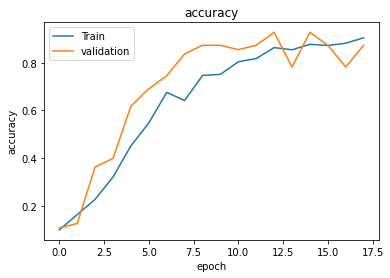

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','validation'],loc='upper left')
plt.show()

In [ ]:
#model=model.load("/content/drive/MyDrive/AI/money.h5")

In [22]:
train.class_indices

{'1000': 0,
 '10000': 1,
 '100000': 2,
 '200': 3,
 '2000': 4,
 '20000': 5,
 '200000': 6,
 '500': 7,
 '5000': 8,
 '50000': 9,
 '500000': 10}

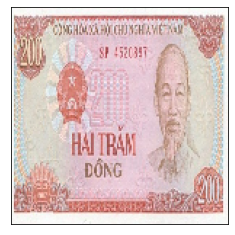

200


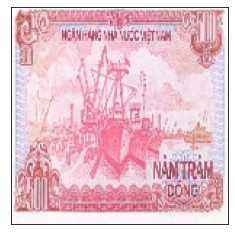

500


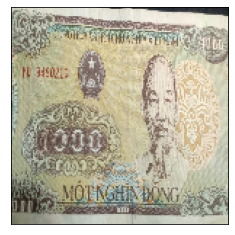

1.000


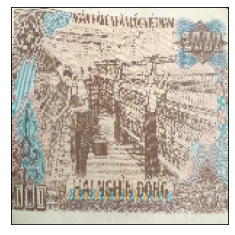

2.000


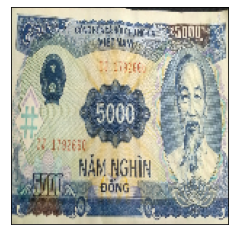

5.000


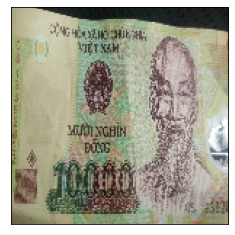

10.000


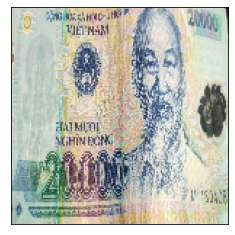

20.000


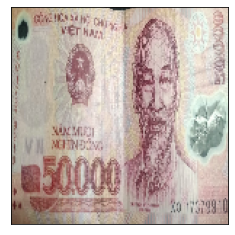

50.000


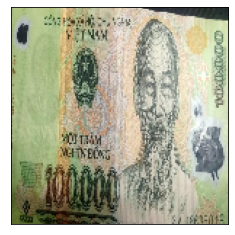

100.000


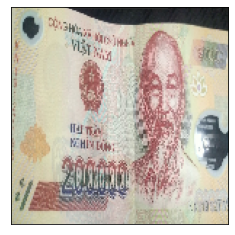

200.000


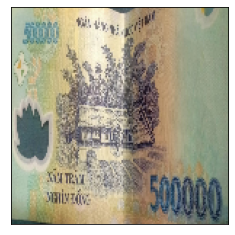

500.000


In [23]:
dir = '/content/drive/MyDrive/AI/money/test'
for i in os.listdir(dir):
  img = load_img(dir +'//'+ i, target_size=(150,150))
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img)
  plt.show()
  x= img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images = np.vstack([x])
  val=np.argmax(model.predict(images))
  if val == 0:
    print("1.000")
  if val == 1:
    print("10.000")
  if val == 2:
    print("100.000")
  if val == 3:
    print("200")
  if val == 4:
    print("2.000")
  if val == 5:
    print("20.000")
  if val == 6:
    print("200.000")
  if val == 7:
    print("500")
  if val == 8:
    print("5.000")
  if val == 9:
    print("50.000")
  if val == 10:
    print("500.000")